In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('historico_fastback.csv')
df = df.iloc[::-1]
df.head()

,Valor,Marca,Modelo,AnoModelo,Combustivel,CodigoFipe,MesReferencia,Autenticacao,TipoVeiculo,SiglaCombustivel,DataConsulta
20,"R$ 111.020,00",Fiat,Fastback 1.0 200 Turbo Flex Aut,2024,Gasolina,001568-7,agosto de 2023,gjhk3d2qvfdt3,1,G,"sexta-feira, 11 de abril de 2025 16:14"
19,"R$ 110.409,00",Fiat,Fastback 1.0 200 Turbo Flex Aut,2024,Gasolina,001568-7,setembro de 2023,ghscnksfm4dt3,1,G,"sexta-feira, 11 de abril de 2025 16:14"
18,"R$ 114.273,00",Fiat,Fastback 1.0 200 Turbo Flex Aut,2024,Gasolina,001568-7,outubro de 2023,gm9tfx0rrjdt3,1,G,"sexta-feira, 11 de abril de 2025 16:14"
17,"R$ 115.040,00",Fiat,Fastback 1.0 200 Turbo Flex Aut,2024,Gasolina,001568-7,novembro de 2023,gn6pnt60fgdt3,1,G,"sexta-feira, 11 de abril de 2025 16:14"
16,"R$ 117.174,00",Fiat,Fastback 1.0 200 Turbo Flex Aut,2024,Gasolina,001568-7,dezembro de 2023,grp748zrzydt3,1,G,"sexta-feira, 11 de abril de 2025 16:14"


In [9]:
df.shape

(21, 11)

In [41]:
df['Valor'] = df['Valor'].apply(lambda x: float(x.split()[1].replace('.','').replace(',','.')))
df['Valor']

20    111020.0
19    110409.0
18    114273.0
17    115040.0
16    117174.0
15    116726.0
14    112640.0
13    112527.0
12    111201.0
11    111592.0
10    111964.0
9     109843.0
8     108549.0
7     108626.0
6     107895.0
5     108672.0
4     108625.0
3     107990.0
2     109377.0
1     107843.0
0     109246.0
Name: Valor, dtype: float64

In [42]:
df['Variação (%)'] = df['Valor'].pct_change()*100


df['Hover'] = df.apply(
    lambda row: f"Data: {row['MesReferencia']}<br>Valor: {row['Valor']:.2f}<br>Variação: {row['Variação (%)']:.2f}%" 
    if not pd.isna(row['Variação (%)']) else
    f"Data: {row['MesReferencia']}<br>Valor: {row['Valor']:.2f}<br>Variação: N/A",
    axis=1
)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'agosto de 2023 '),
  Text(1, 0, 'setembro de 2023 '),
  Text(2, 0, 'outubro de 2023 '),
  Text(3, 0, 'novembro de 2023 '),
  Text(4, 0, 'dezembro de 2023 '),
  Text(5, 0, 'janeiro de 2024 '),
  Text(6, 0, 'fevereiro de 2024 '),
  Text(7, 0, 'março de 2024 '),
  Text(8, 0, 'abril de 2024 '),
  Text(9, 0, 'maio de 2024 '),
  Text(10, 0, 'junho de 2024 '),
  Text(11, 0, 'julho de 2024 '),
  Text(12, 0, 'agosto de 2024 '),
  Text(13, 0, 'setembro de 2024 '),
  Text(14, 0, 'outubro de 2024 '),
  Text(15, 0, 'novembro de 2024 '),
  Text(16, 0, 'dezembro de 2024 '),
  Text(17, 0, 'janeiro de 2025 '),
  Text(18, 0, 'fevereiro de 2025 '),
  Text(19, 0, 'março de 2025 '),
  Text(20, 0, 'abril de 2025 ')])

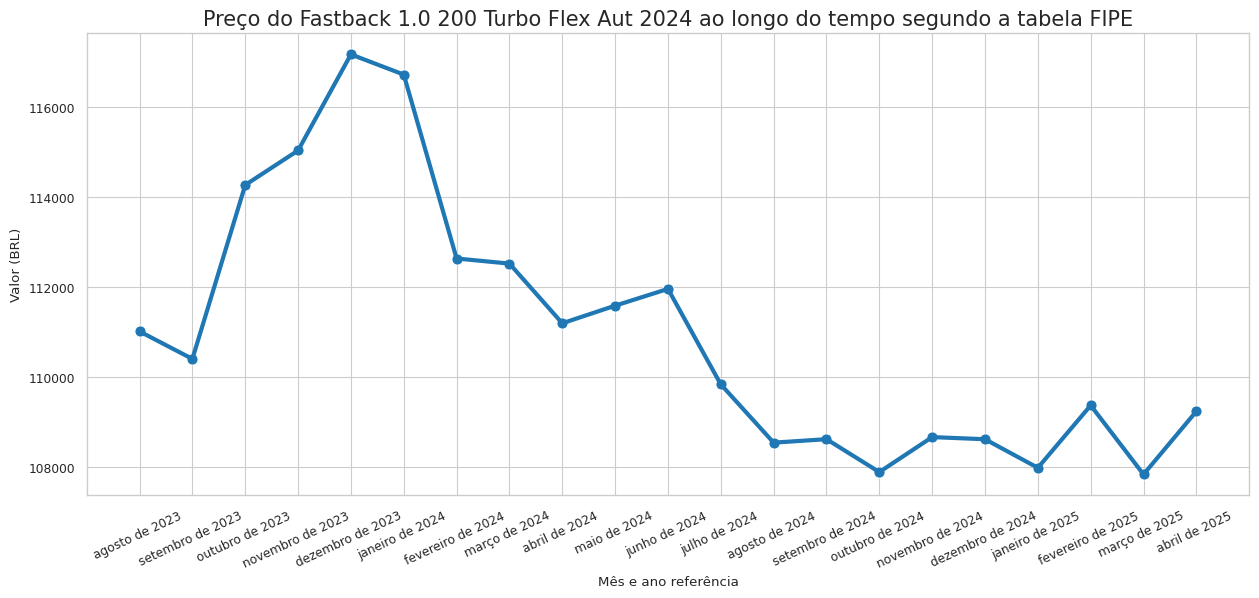

In [ ]:
df_reverse_rows = df.iloc[::-1]
fig, ax = plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.set_context('paper', rc={'lines.linewidth':3, 'lines.markersize': 8, 'axes.grid': True})
sns.lineplot(x='MesReferencia', y='Valor', data=df_reverse_rows, ax=ax)
sns.scatterplot(x='MesReferencia', y='Valor', data=df_reverse_rows, ax=ax)
ax.set_title(f'Preço do {df["Modelo"][0]} {df["AnoModelo"][0]} ao longo do tempo segundo a tabela FIPE', fontdict={'fontsize': 15})
ax.set_xlabel('Mês e ano referência')
ax.set_ylabel('Valor (BRL)')
plt.xticks(rotation=25)


In [27]:
import plotly.graph_objects as go

In [ ]:
# Plot interativo
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['MesReferencia'],
    y=df['Valor'],
    mode='lines+markers',
    marker=dict(color='blue'),
    hovertext=df['Hover'],
    hoverinfo='text'
))

fig.update_layout(
    title='Série Temporal com Variação Percentual',
    xaxis_title='Mês e ano referência',
    yaxis_title='Valor',
    hovermode='x unified'
)

fig.show()

In [3]:
import fipe_api

lista_de_veiculos_fiat = fipe_api.guardar_codigo_marcas('21')

response status code: 200
File created!


/home/estaciolima/meu-proximo-carro/fipe_api.py:86: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(lista_de_codigos.text)


In [2]:
lista_de_veiculos_fiat

<Response [200]>